In [49]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train, X_test

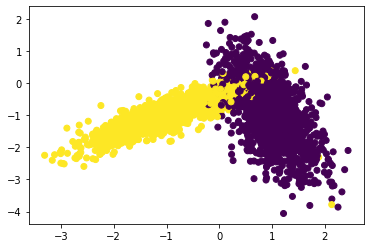

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [51]:
a = [[2,3],[3,4],[1,2]]
print(a)
print(a[0])
b = []
for i in range(0,3):
    b += a[i]
print(b)

[[2, 3], [3, 4], [1, 2]]
[2, 3]
[2, 3, 3, 4, 1, 2]


In [52]:
from random import randrange
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
# Split's dataset into k folds
def cvs(dataset, folds):
    dataset_split = list()
    dataset_copy = list(range(len(dataset)))
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def randomcv(x_train,y_train,classifier, params, folds):
    trainscores = []
    testscores  = []    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        x_trainf = cvs(x_train,folds)
        for j in range(0, folds):
            train_data = list(x_trainf)
            # check this out: https://stackoverflow.com/a/9755548/4084039
            
            test_indices  = train_data[j]
            train_data.remove(train_data[j])
            
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            # selecting the data points based on the train_indices and test_indices
            b=[]
            for i in range(len(train_data)):
                b += train_data[i]
            X_train = x_train[b]
            Y_train = y_train[b]
            

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
            #print(testscores_folds,trainscores_folds)
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
        #print(trainscores,testscores)
    return trainscores,testscores



  0%|          | 0/10 [00:00<?, ?it/s]

[ 6 18 19 22 24 31 32 34 42 44]




 10%|█         | 1/10 [00:01<00:16,  1.79s/it]

 20%|██        | 2/10 [00:03<00:14,  1.82s/it]

 30%|███       | 3/10 [00:05<00:12,  1.84s/it]

 40%|████      | 4/10 [00:07<00:11,  1.87s/it]

 50%|█████     | 5/10 [00:09<00:09,  1.92s/it]

 60%|██████    | 6/10 [00:11<00:08,  2.03s/it]

 70%|███████   | 7/10 [00:13<00:06,  2.05s/it]

 80%|████████  | 8/10 [00:15<00:04,  2.05s/it]

 90%|█████████ | 9/10 [00:18<00:02,  2.09s/it]

100%|██████████| 10/10 [00:20<00:00,  2.12s/it]

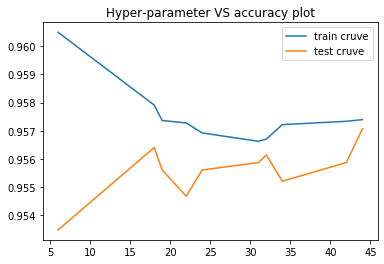

In [55]:
neigh = KNeighborsClassifier()
b = np.random.randint(1,50,10)
b.sort()
params = {'n_neighbors':b}
folds = 10
print(b)
trainscores,testscores = randomcv(X_train, y_train, neigh, params, folds)

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [54]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

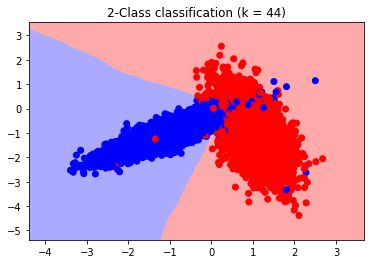

In [56]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 44) #k = 44 from the above graph
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)